In [333]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Muons

## Muon generation

In [334]:
from tomopt.muon import generate_batch

In [335]:
x = generate_batch(10000)

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


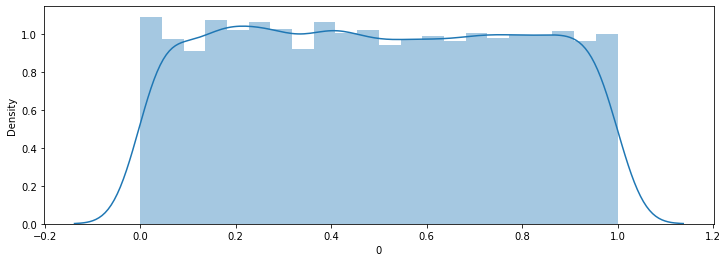

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


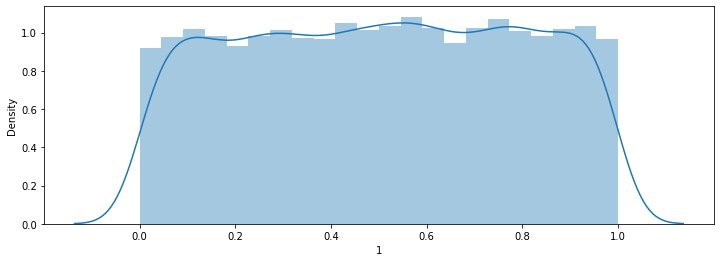

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


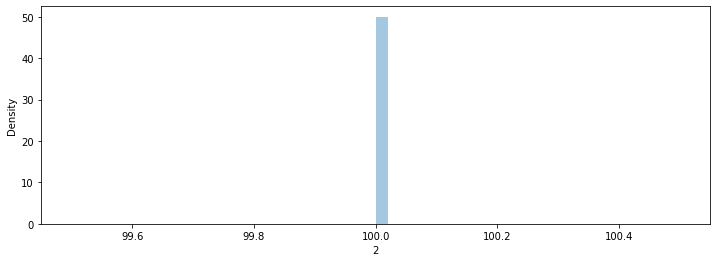

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


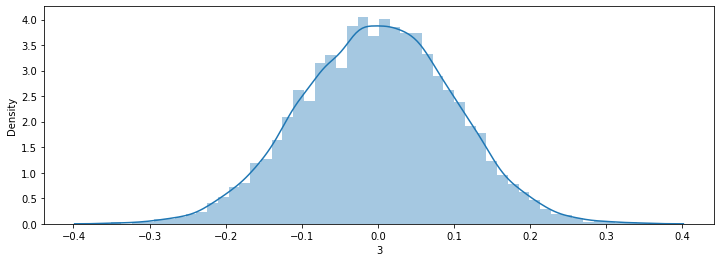

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


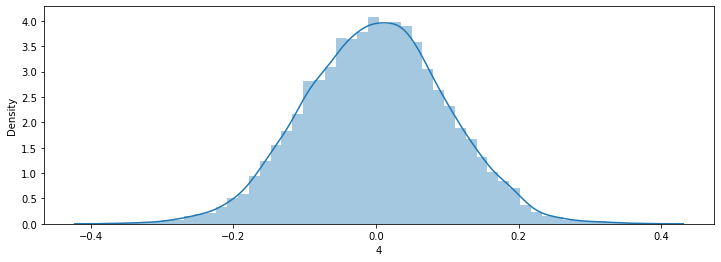

In [337]:
for i in range(x.shape[1]):
    try:
        plt.figure(figsize=(12,4))
        sns.distplot(x[:,i])
        plt.xlabel(i)
        plt.show()
    except RuntimeError:
        pass

In [338]:
m = generate_batch(100)

## Muon Batch

In [339]:
from tomopt.muon import MuonBatch

In [340]:
batch = MuonBatch(generate_batch(1000), init_z=1)

In [341]:
batch2 = MuonBatch(generate_batch(1000), init_z=1)

In [342]:
d = batch.dtheta_x(batch2); d.min(),d.max()

(tensor(0.0002), tensor(0.4827))

In [343]:
d = batch.dtheta(batch2); d.min(),d.max()

(tensor(0.0044), tensor(0.5412))

In [344]:
batch.xy

tensor([[0.2112, 0.2229],
        [0.8108, 0.8384],
        [0.5883, 0.6966],
        ...,
        [0.6259, 0.6511],
        [0.9760, 0.5731],
        [0.8062, 0.3799]])

In [345]:
batch.snapshot_xyz()

In [346]:
batch.xy_hist

OrderedDict([(1.0,
              array([[0.21120697, 0.22288144],
                     [0.8108016 , 0.8383879 ],
                     [0.5882765 , 0.6966084 ],
                     ...,
                     [0.62585926, 0.6510753 ],
                     [0.97601956, 0.5730688 ],
                     [0.8062155 , 0.37993127]], dtype=float32))])

In [347]:
batch.propagate(0.1)

In [348]:
batch.xy

tensor([[0.2091, 0.2252],
        [0.8232, 0.8413],
        [0.5880, 0.6974],
        ...,
        [0.6191, 0.6513],
        [0.9747, 0.5722],
        [0.8050, 0.3717]])

In [349]:
batch.xy_hist

OrderedDict([(1.0,
              array([[0.21120697, 0.22288144],
                     [0.8108016 , 0.8383879 ],
                     [0.5882765 , 0.6966084 ],
                     ...,
                     [0.62585926, 0.6510753 ],
                     [0.97601956, 0.5730688 ],
                     [0.8062155 , 0.37993127]], dtype=float32))])

In [350]:
batch.snapshot_xyz()

In [351]:
batch.xy_hist

OrderedDict([(1.0,
              array([[0.21120697, 0.22288144],
                     [0.8108016 , 0.8383879 ],
                     [0.5882765 , 0.6966084 ],
                     ...,
                     [0.62585926, 0.6510753 ],
                     [0.97601956, 0.5730688 ],
                     [0.8062155 , 0.37993127]], dtype=float32)),
             (0.9,
              array([[0.2090549 , 0.22522117],
                     [0.82324606, 0.8412954 ],
                     [0.58795464, 0.69737977],
                     ...,
                     [0.61905134, 0.6513109 ],
                     [0.9747188 , 0.57219476],
                     [0.8050255 , 0.3717492 ]], dtype=float32))])

# Volume+Detector

## Volume

In [352]:
import torch
from torch import Tensor

In [353]:
from tomopt.core import X0

In [354]:
X0

{'beryllium': 0.3528,
 'carbon': 0.1932,
 'aluminium': 0.08897,
 'silicon': 0.0937,
 'iron': 0.01757,
 'copper': 0.01436,
 'lead': 0.005612}

In [355]:
def arb_rad_length(*,z:float, lw:Tensor, size:float) -> float:
    rad_length = torch.ones(list((lw/size).long()))*X0['lead']
    if z >= 0.4 and z <= 0.5: rad_length[...] = X0['beryllium']
#     if z == 0.6 : rad_length[...] = X0['beryllium']
        
    return rad_length

In [356]:
d = arb_rad_length(z=0.6, lw=Tensor([1,1]), size=0.1);d

tensor([[0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056],
        [0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056, 0.0056,
         0.0056]])

In [357]:
d = arb_rad_length(z=0.5, lw=Tensor([1,1]), size=0.1);d

tensor([[0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528],
        [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
         0.3528]])

In [358]:
x = generate_batch(10)

In [359]:
idxs = torch.floor(x[:,:2]/0.1).long()

In [360]:
d[idxs[:,0],idxs[:,1]]

tensor([0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 0.3528,
        0.3528])

In [361]:
from tomopt.volume import PassiveLayer, DetectorLayer

In [362]:
vl = PassiveLayer(arb_rad_length, lw=Tensor([1,1]), z=0.5, size=0.1)

In [363]:
batch = MuonBatch(generate_batch(1000), 1.0)

In [364]:
batch.xy

tensor([[0.1568, 0.0378],
        [0.8980, 0.3328],
        [0.5541, 0.0207],
        ...,
        [0.0580, 0.8873],
        [0.2413, 0.3628],
        [0.7067, 0.1157]])

In [365]:
batch.theta_x

tensor([-9.6992e-03, -1.8265e-01,  3.2104e-02, -4.7056e-02, -1.5041e-01,
         5.7318e-03,  7.1079e-02,  6.1431e-02, -1.6255e-01, -1.1860e-01,
         1.9539e-01, -9.2715e-02, -1.3744e-01,  6.7193e-03, -1.1559e-02,
         1.0420e-02,  7.8381e-03, -1.9102e-01,  2.1490e-01,  7.2174e-02,
        -1.0039e-01, -6.6650e-02,  3.3230e-02,  2.1508e-01,  3.5602e-02,
        -5.2158e-02,  5.0017e-02,  6.6951e-02, -1.3298e-01,  5.3952e-02,
        -5.7080e-02, -1.0165e-01,  3.2646e-02, -9.6445e-02, -5.4630e-03,
        -1.2297e-01, -1.5210e-01, -1.6896e-01, -1.3009e-01, -1.7297e-01,
         1.5741e-01,  1.4219e-01,  1.6045e-01,  1.8221e-01,  6.6151e-02,
         1.7377e-01,  2.6593e-02,  1.6935e-01, -1.5860e-01,  2.9026e-02,
         9.6560e-03,  2.1471e-02,  2.1073e-02,  1.8059e-01,  6.7349e-02,
         1.5135e-02, -2.0603e-02,  9.0362e-03,  8.7541e-02,  3.9805e-02,
         4.4987e-02, -9.6233e-02,  1.8308e-01,  1.4488e-01,  2.2050e-01,
        -9.3499e-02,  4.1432e-02,  1.4137e-01, -8.8

In [366]:
batch.z

tensor([1.])

In [367]:
vl(batch)

In [368]:
batch.theta_x

tensor([-9.6993e-03, -1.8266e-01,  3.2089e-02, -4.7062e-02, -1.5040e-01,
         5.7496e-03,  7.1050e-02,  6.1447e-02, -1.6255e-01, -1.1862e-01,
         1.9540e-01, -9.2663e-02, -1.3745e-01,  6.7262e-03, -1.1578e-02,
         1.0418e-02,  7.8366e-03, -1.9095e-01,  2.1494e-01,  7.2145e-02,
        -1.0040e-01, -6.6638e-02,  3.3225e-02,  2.1509e-01,  3.5653e-02,
        -5.2193e-02,  5.0000e-02,  6.6970e-02, -1.3299e-01,  5.3979e-02,
        -5.7048e-02, -1.0163e-01,  3.2633e-02, -9.6439e-02, -5.4264e-03,
        -1.2294e-01, -1.5210e-01, -1.6896e-01, -1.3009e-01, -1.7298e-01,
         1.5744e-01,  1.4221e-01,  1.6045e-01,  1.8222e-01,  6.6161e-02,
         1.7378e-01,  2.6602e-02,  1.6937e-01, -1.5860e-01,  2.9011e-02,
         9.6360e-03,  2.1466e-02,  2.1003e-02,  1.8066e-01,  6.7320e-02,
         1.5153e-02, -2.0619e-02,  9.0392e-03,  8.7571e-02,  3.9809e-02,
         4.5047e-02, -9.6246e-02,  1.8308e-01,  1.4490e-01,  2.2048e-01,
        -9.3489e-02,  4.1405e-02,  1.4141e-01, -8.8

In [369]:
batch.xy

tensor([[0.1558, 0.0382],
        [0.8795, 0.3275],
        [0.5573, 0.0173],
        ...,
        [0.0611, 0.8792],
        [0.2614, 0.3616],
        [0.7035, 0.1117]])

In [370]:
batch.z

tensor([0.9000])

## Detector

### Cost functions

In [371]:
import torch.nn.functional as F

In [372]:
def eff_cost(x:Tensor) -> Tensor:
    return torch.expm1(3*F.relu(x))

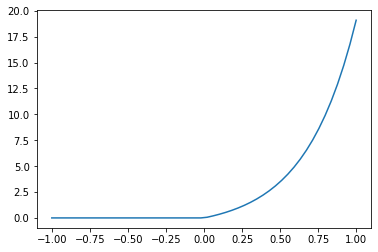

In [373]:
x = torch.linspace(-1,1,50)
plt.plot(x,eff_cost(x))

In [374]:
def res_cost(x:Tensor) -> Tensor:
    return F.relu(x/100)**2

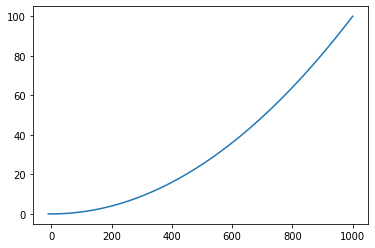

In [375]:
x = torch.linspace(-10,1000,50)
plt.plot(x,res_cost(x))

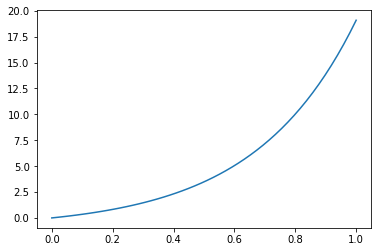

In [376]:
x = torch.linspace(0,1,50)
plt.plot(x,res_cost(x)+eff_cost(x))

### layer

In [377]:
batch = MuonBatch(generate_batch(1000), 1)

In [378]:
dl = DetectorLayer('above', 1,1,Tensor([1,1]),1,0.1, eff_cost_func=eff_cost, res_cost_func=res_cost)

In [379]:
dl.resolution

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)

In [380]:
dl(batch)
dl(batch)
dl(batch)

In [381]:
hits = batch.get_hits(Tensor([1,1]))

In [382]:
hits['above']['xy'].shape

torch.Size([946, 3, 2])

# Volume 

In [383]:
def get_layers():
    layers = []
    lwh = Tensor([1,1,1])
    size = 0.1
    init_eff = 0.5
    init_res = 1000
    pos = 'above'
    for z,d in zip(np.arange(lwh[2],0,-size), [1,1,0,0,0,0,0,0,1,1]):
        if d:
            layers.append(DetectorLayer(pos=pos, init_eff=init_eff, init_res=init_res,
                                        lw=lwh[:2], z=z, size=size, eff_cost_func=eff_cost, res_cost_func=res_cost))
        else:
            pos = 'below'
            layers.append(PassiveLayer(rad_length_func=arb_rad_length, lw=lwh[:2], z=z, size=size))

    return nn.ModuleList(layers) 

In [384]:
import numpy as np
from torch import nn

In [385]:
layers = get_layers()

In [386]:
from tomopt.volume import Volume

In [387]:
volume = Volume(layers=layers); volume

Volume(
  (layers): ModuleList(
    (0): DetectorLayer()
    (1): DetectorLayer()
    (2): PassiveLayer()
    (3): PassiveLayer()
    (4): PassiveLayer()
    (5): PassiveLayer()
    (6): PassiveLayer()
    (7): PassiveLayer()
    (8): DetectorLayer()
    (9): DetectorLayer()
  )
)

In [388]:
volume.lw, volume.size, volume.h, volume.get_passive_z_range()

(tensor([1., 1.]), 0.1, 1.0, (tensor([0.2000]), tensor([0.8000])))

In [389]:
batch = MuonBatch(generate_batch(1000), init_z=1)

In [390]:
volume(batch)

In [391]:
hits = batch.get_hits(Tensor([1,1]))

In [392]:
hits['above']['xy'].shape

torch.Size([871, 2, 2])

In [393]:
volume.get_rad_cube().shape

torch.Size([6, 10, 10])

# Atomic number reco

## Compute deviations and scatter locations

In [394]:
from tomopt.inference import ScatterBatch

In [395]:
scatters = ScatterBatch(batch, volume)

In [396]:
scatters.location

tensor([[ 0.0366,  0.8137,  0.5312],
        [ 0.1882,  0.8030,  0.3269],
        [ 0.6461,  0.0500, -3.7250],
        ...,
        [ 0.1081,  0.2965,  0.3702],
        [ 0.4207,  0.8283,  0.8871],
        [ 0.1432,  0.0470,  0.4243]], grad_fn=<AddBackward0>)

In [397]:
scatters.location_unc

tensor([[3.0631e-02, 2.0403e-02, 8.8653e-01],
        [6.7629e-02, 3.1678e-02, 6.1530e-01],
        [6.2754e-02, 1.7837e+00, 1.8938e+01],
        ...,
        [4.4163e-02, 7.2901e-02, 3.4656e-01],
        [3.8643e-02, 6.5510e-02, 8.2722e-01],
        [7.3888e-02, 6.8999e-03, 3.6935e-01]], grad_fn=<SqrtBackward>)

In [398]:
scatters.dtheta

tensor([[0.0007, 0.0019],
        [0.0007, 0.0038],
        [0.0003, 0.0006],
        ...,
        [0.0025, 0.0012],
        [0.0022, 0.0024],
        [0.0017, 0.0047]], grad_fn=<DivBackward0>)

In [399]:
scatters.dtheta_unc

tensor([[0.0107, 0.0116],
        [0.0224, 0.0158],
        [0.0239, 0.0171],
        ...,
        [0.0104, 0.0143],
        [0.0143, 0.0250],
        [0.0261, 0.0146]], grad_fn=<SqrtBackward>)

In [400]:
scatters.dxy

tensor([[-7.2957e-03, -2.8439e-03],
        [-1.1312e-02,  2.1665e-03],
        [-6.2739e-03, -2.7584e-03],
        ...,
        [-3.2398e-05,  6.7260e-05],
        [-9.5502e-03,  8.6984e-03],
        [-8.1721e-03,  3.1671e-03]], grad_fn=<MulBackward0>)

In [401]:
scatters.dxy_unc

tensor([[0.0048, 0.0067],
        [0.0135, 0.0090],
        [0.0859, 0.0063],
        ...,
        [0.0019, 0.0039],
        [0.0066, 0.0186],
        [0.0126, 0.0053]], grad_fn=<SqrtBackward>)

In [402]:
scatters.theta_in

tensor([[-0.0384,  0.0271],
        [ 0.1030, -0.0396],
        [-0.0008,  0.0920],
        ...,
        [ 0.1370, -0.1976],
        [-0.0451,  0.0893],
        [-0.2045,  0.0321]], grad_fn=<AtanBackward>)

In [403]:
scatters.theta_in_unc

tensor([[0.0093, 0.0036],
        [0.0186, 0.0072],
        [0.0189, 0.0107],
        ...,
        [0.0059, 0.0093],
        [0.0003, 0.0229],
        [0.0214, 0.0112]], grad_fn=<SqrtBackward>)

In [404]:
batch.theta

tensor([0.1782, 0.0366, 0.1242, 0.0783, 0.1108, 0.1553, 0.0324, 0.1186, 0.1328,
        0.0444, 0.1230, 0.0944, 0.0683, 0.0763, 0.0599, 0.2818, 0.0991, 0.1321,
        0.2574, 0.1245, 0.0821, 0.2201, 0.0730, 0.1826, 0.1384, 0.2173, 0.1986,
        0.1468, 0.1299, 0.0969, 0.0459, 0.0749, 0.1269, 0.1539, 0.0517, 0.0880,
        0.1190, 0.1146, 0.0172, 0.1252, 0.2028, 0.2263, 0.0424, 0.1934, 0.0362,
        0.0918, 0.2207, 0.0134, 0.2302, 0.0770, 0.1678, 0.1699, 0.0448, 0.1966,
        0.1979, 0.1352, 0.0871, 0.2132, 0.1325, 0.0706, 0.2007, 0.0573, 0.2232,
        0.0943, 0.1174, 0.2005, 0.0915, 0.0469, 0.2152, 0.1609, 0.0508, 0.1813,
        0.0451, 0.1104, 0.0300, 0.0862, 0.0047, 0.0417, 0.2425, 0.1594, 0.1939,
        0.0258, 0.0812, 0.0544, 0.2707, 0.2171, 0.2152, 0.0522, 0.0620, 0.1624,
        0.1538, 0.0480, 0.0711, 0.1415, 0.2369, 0.1186, 0.1910, 0.0791, 0.0314,
        0.0980, 0.0854, 0.0671, 0.1215, 0.1069, 0.1001, 0.0338, 0.1747, 0.1986,
        0.1183, 0.1481, 0.2788, 0.0829, 

In [405]:
scatters.theta_out

tensor([[-0.0341,  0.0159],
        [ 0.0987, -0.0623],
        [-0.0025,  0.0959],
        ...,
        [ 0.1223, -0.2045],
        [-0.0583,  0.0749],
        [-0.2149,  0.0041]], grad_fn=<AtanBackward>)

/Users/giles/anaconda3/envs/tomopt/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.50524116

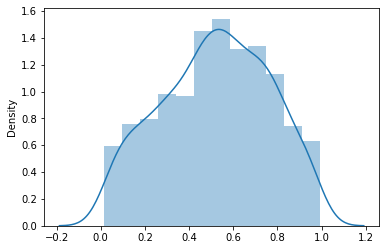

In [406]:
z = scatters.location[:,2].cpu().detach().numpy()
m = (z>0)*(z<1)
sns.distplot(z[m])
z.mean()

In [ ]:
scatters.dte

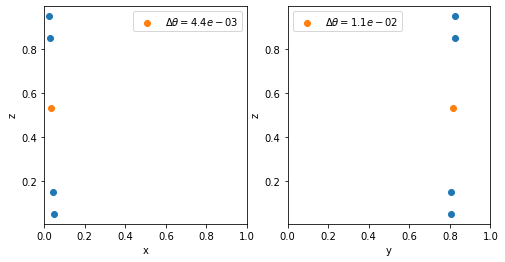

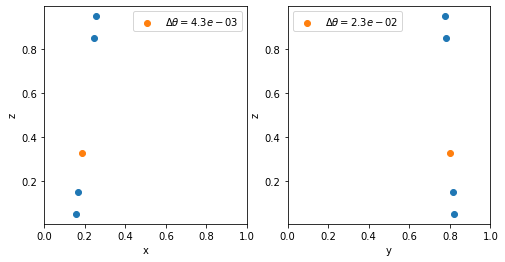

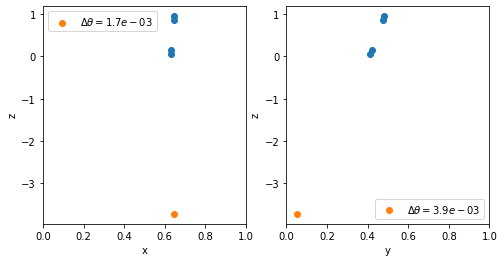

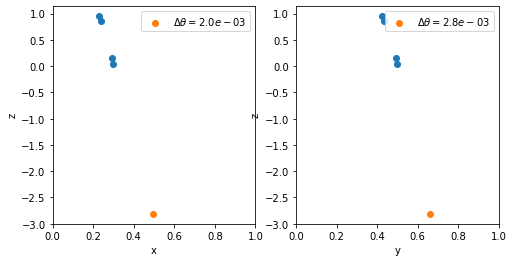

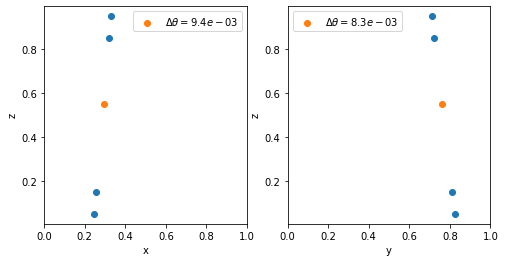

In [423]:
for i in range(5): scatters.plot_scatter(i)

## Infer rad length

In [414]:
from tomopt.inference import X0Inferer

In [415]:
x0_inferer = X0Inferer(scatters)

In [417]:
x0_inferer.x0_from_dtheta()

(tensor([ 1084.8477,  3955.2576,  1164.0389,  7051.1445,  6677.7783,  5416.8760,
          3583.9141, 15140.4199,  5853.9355, 19295.6191,  3521.3259, 10204.6846,
         15402.3818,  7771.3193, 19646.1270,  2053.2119,  5285.3242,  2452.1106,
          2686.7356,  3130.4436, 11567.2725,  4851.6323, 13040.9707,  6769.3501,
         15699.9229,  1354.3029,  3683.3660,  2346.1248,  4050.9038,  8442.6289,
         14861.6514, 19991.3848,  1436.5349,  3473.3313,  8415.7100, 21079.0312,
          3946.6616,   720.4020,   584.9803,  9606.7959,  4810.2246,  2821.3967,
          3624.7131,  4811.9346,  4588.5776,  2397.3040,  2070.4126,  2650.8572,
         25651.3359, 13007.0762,  3076.9897,  6357.7935,   841.8696,  5713.9351,
         18523.0078,  2726.2634, 11961.5205, 25650.5117,  8235.9727,  4462.1597,
         13179.4443,  3531.9888,  3308.1860,   399.7008, 12435.8115, 12585.1514,
         21578.4570, 16339.3740,  7169.1904,  1789.8971, 11741.6182,  6616.3643,
          3508.9028,  2638.0

In [124]:
pred,weight = x0_inferer.pred_x0()

In [125]:
pred

tensor([[[1.7593e+03, 3.5280e-01, 7.4696e+03, 4.1719e+02, 3.5280e-01,
          3.5280e-01, 3.5280e-01, 3.5280e-01, 3.5280e-01, 3.5280e-01],
         [3.5280e-01, 3.5280e-01, 3.5280e-01, 3.5280e-01, 4.7909e+03,
          1.3857e+04, 3.5280e-01, 1.2250e+03, 3.5280e-01, 3.5280e-01],
         [3.5280e-01, 3.5280e-01, 1.3442e+03, 2.4588e+03, 3.5280e-01,
          7.0500e+03, 1.0978e+04, 3.5280e-01, 4.8811e+03, 1.2789e+04],
         [3.5280e-01, 3.5280e-01, 9.9475e+03, 6.6128e+03, 3.5280e-01,
          3.5280e-01, 2.1799e+04, 3.5280e-01, 3.5280e-01, 3.5280e-01],
         [3.5280e-01, 3.5280e-01, 6.2802e+03, 1.7124e+04, 3.5280e-01,
          3.5280e-01, 3.5280e-01, 6.7451e+03, 3.5280e-01, 2.6937e+03],
         [3.5280e-01, 3.5280e-01, 3.5280e-01, 1.9055e+03, 1.3292e+04,
          7.0874e+03, 2.3284e+04, 3.5280e-01, 9.6835e+03, 3.5280e-01],
         [3.5280e-01, 7.1890e+03, 8.1263e+03, 2.7571e+03, 3.5280e-01,
          3.5280e-01, 1.4720e+04, 7.2754e+03, 3.5280e-01, 3.5280e-01],
         [3.5

In [75]:
pred

tensor([[[0.3528, 0.3528, 0.3528, 0.4328, 0.6498, 0.3528, 0.3528, 0.3528,
          2.0553, 1.0672],
         [1.1930, 0.1866, 0.3162, 0.3528, 3.4863, 0.3528, 1.8596, 0.3528,
          0.2391, 0.3528],
         [0.6008, 0.3528, 0.3528, 0.1814, 0.3528, 0.6067, 0.3528, 0.3528,
          0.3528, 1.3119],
         [0.3528, 1.3977, 0.3528, 0.5801, 0.3528, 0.1193, 0.3528, 0.3528,
          0.2368, 0.3528],
         [0.3528, 1.2706, 0.3528, 0.8499, 0.6148, 0.3528, 0.2370, 0.2049,
          1.1034, 4.1487],
         [0.3528, 0.3528, 0.3528, 0.3528, 0.3528, 4.0792, 0.3528, 0.3528,
          0.3528, 0.3528],
         [0.3528, 1.5249, 0.9772, 0.3528, 0.6746, 0.5259, 0.3689, 0.3528,
          1.3131, 0.3528],
         [0.3528, 1.2187, 1.3212, 0.3528, 1.5011, 0.3064, 0.2588, 1.0832,
          0.3528, 1.6338],
         [0.8412, 0.9577, 1.0983, 0.2449, 0.3528, 2.0360, 0.3528, 0.6150,
          0.3528, 0.7172],
         [0.3528, 0.3528, 0.8775, 0.3528, 0.3528, 0.0373, 1.1439, 0.3528,
          0.4668,

In [96]:
torch.empty(0)

tensor([])

In [76]:
X0['aluminium'], X0['lead'], X0['beryllium']

(0.08897, 0.005612, 0.3528)

# Loss

In [77]:
from tomopt.loss import DetectorLoss

In [90]:
loss = DetectorLoss(1e-6)

In [91]:
loss(pred, volume)

tensor(4.8544, grad_fn=<AddBackward0>)

In [92]:
volume.get_cost()

tensor(4001392.7500, grad_fn=<AddBackward0>)